In [1]:
import import_ipynb
import conexaoBanco
import limpezaDados
from decimal import Decimal
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud

importing Jupyter notebook from conexaoBanco.ipynb
importing Jupyter notebook from limpezaDados.ipynb


# Questões 1 a 4

!!!Questão 1!!!
Jair - Sentimento Positivo: 616 | Sentimento negativo: 576 | Sentimento neutro: 973


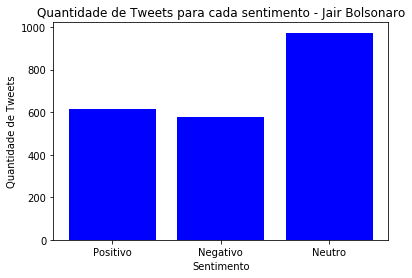

!!!Questão 2!!!
Score de sentimento dos Tweets de Jair Bolsonaro: 0.15861


!!!Questão 3!!!
Flávio - Sentimento Positivo: 869 | Sentimento negativo: 1112 | Sentimento neutro: 1192


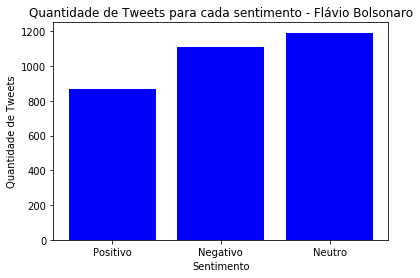

!!!Questão 4!!!
Score de sentimento dos Tweets de Flávio Bolsonaro: 0.06840


In [2]:
conexao = conexaoBanco.operacoesBD()
quant_positivo_jair = conexao.selecionar_tweets_politico('Positivo', '%jair%')
quant_negativo_jair = conexao.selecionar_tweets_politico('Negativo', '%jair%')
quant_neutro_jair = conexao.selecionar_tweets_politico('Neutro', '%jair%')
print("!!!Questão 1!!!")
print(f'Jair - Sentimento Positivo: {quant_positivo_jair} | Sentimento negativo: {quant_negativo_jair} | Sentimento neutro: {quant_neutro_jair}')

sentimentos = ['Positivo', 'Negativo', 'Neutro']
quant_sentimentos_jair = [quant_positivo_jair, quant_negativo_jair, quant_neutro_jair]

plt.bar(sentimentos, quant_sentimentos_jair, color = "blue")
plt.xticks(sentimentos)
plt.xlabel("Sentimento")
plt.ylabel("Quantidade de Tweets")
plt.title("Quantidade de Tweets para cada sentimento - Jair Bolsonaro")
plt.show()

soma_score = 0.0
quant_scores = 0
lista_probabilidades = conexao.selecionar_probs_tweets('%jair%')
for prob_tweet in lista_probabilidades:
    if(prob_tweet['sentimento'] == 'Positivo'):
        soma_score = soma_score + float(prob_tweet['probabilidade_positivo'])
        quant_scores = quant_scores + 1
    elif(prob_tweet['sentimento'] == 'Negativo'):
        soma_score = soma_score - float(prob_tweet['probabilidade_negativo'])
        quant_scores = quant_scores + 1
    else:
        soma_score = soma_score + 1 - float(prob_tweet['probabilidade_neutro'])
        quant_scores = quant_scores + 1
        
media_score = soma_score/quant_scores
print("!!!Questão 2!!!")
print('Score de sentimento dos Tweets de Jair Bolsonaro: %.5f\n\n' %media_score)    


quant_positivo_flavio = conexao.selecionar_tweets_politico('Positivo', '%flavio%')
quant_negativo_flavio = conexao.selecionar_tweets_politico('Negativo', '%flavio%')
quant_neutro_flavio = conexao.selecionar_tweets_politico('Neutro', '%flavio%')
print("!!!Questão 3!!!")
print(f'Flávio - Sentimento Positivo: {quant_positivo_flavio} | Sentimento negativo: {quant_negativo_flavio} | Sentimento neutro: {quant_neutro_flavio}')

sentimentos = ['Positivo', 'Negativo', 'Neutro']
quant_sentimentos_flavio = [quant_positivo_flavio, quant_negativo_flavio, quant_neutro_flavio]

plt.bar(sentimentos, quant_sentimentos_flavio, color = "blue")
plt.xticks(sentimentos)
plt.xlabel("Sentimento")
plt.ylabel("Quantidade de Tweets")
plt.title("Quantidade de Tweets para cada sentimento - Flávio Bolsonaro")
plt.show()

soma_score = 0.0
quant_scores = 0
lista_probabilidades = conexao.selecionar_probs_tweets('%flavio%')
for prob_tweet in lista_probabilidades:
    if(prob_tweet['sentimento'] == 'Positivo'):
        soma_score = soma_score + float(prob_tweet['probabilidade_positivo'])
        quant_scores = quant_scores + 1
    elif(prob_tweet['sentimento'] == 'Negativo'):
        soma_score = soma_score - float(prob_tweet['probabilidade_negativo'])
        quant_scores = quant_scores + 1
    else:
        soma_score = soma_score + 1 - float(prob_tweet['probabilidade_neutro'])
        quant_scores = quant_scores + 1
        
media_score = soma_score/quant_scores
print("!!!Questão 4!!!")
print('Score de sentimento dos Tweets de Flávio Bolsonaro: %.5f' %media_score)    



# Questão 5

In [ ]:
lista_tweets = conexao.selecionar_todos__tweets()
considerar = True
todos_tweets = []
for tweet in lista_tweets:
    considerar = limpezaDados.verificar_ruido(tweet['texto'])
    if(considerar):
        todos_tweets.append(limpezaDados.limpar_frase(tweet['texto']))



wordcloud = WordCloud(background_color='black',max_words=100,max_font_size=200, width=1520, height=535,random_state=42).generate(str(todos_tweets))

print(wordcloud)
plt.figure(figsize=(16, 9), edgecolor='blue')
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
fig.savefig("wordum.png", dpi=900)


# Questão 6

In [ ]:
lista_tweets = conexao.selecionar_textos_sentimento('Positivo', '%flavio%')
considerar = True
todos_tweets = []
for tweet in lista_tweets:
    considerar = limpezaDados.verificar_ruido(tweet['texto'])
    if(considerar):
        todos_tweets.append(limpezaDados.limpar_frase(tweet['texto']))



wordcloud = WordCloud(background_color='black',max_words=100,max_font_size=200, width=1520, height=535,random_state=42).generate(str(todos_tweets))

print(wordcloud)
plt.figure(figsize=(16, 9), edgecolor='blue')
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
fig.savefig("worddois.png", dpi=900)

In [ ]:
lista_tweets = conexao.selecionar_textos_sentimento('Negativo', '%flavio%')
considerar = True
todos_tweets = []
for tweet in lista_tweets:
    considerar = limpezaDados.verificar_ruido(tweet['texto'])
    if(considerar):
        todos_tweets.append(limpezaDados.limpar_frase(tweet['texto']))



wordcloud = WordCloud(background_color='black',max_words=100,max_font_size=200, width=1520, height=535,random_state=42).generate(str(todos_tweets))

print(wordcloud)
plt.figure(figsize=(16, 9), edgecolor='blue')
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
fig.savefig("wordtres.png", dpi=900)

# Questão 7

In [ ]:
lista_tweets = conexao.selecionar_textos_sentimento('Neutro', '%jair%')
considerar = True
todos_tweets = []
for tweet in lista_tweets:
    considerar = limpezaDados.verificar_ruido(tweet['texto'])
    if(considerar):
        todos_tweets.append(limpezaDados.limpar_frase(tweet['texto']))



wordcloud = WordCloud(background_color='black',max_words=100,max_font_size=200, width=1520, height=535,random_state=42).generate(str(todos_tweets))

print(wordcloud)
plt.figure(figsize=(16, 9), edgecolor='blue')
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
fig.savefig("wordquatro.png", dpi=900)

# Questão 8

In [ ]:
lista_tweets = conexao.selecionar_textos_sentimento('Positivo', '%jair%')
considerar = True
todos_tweets = []
for tweet in lista_tweets:
    considerar = limpezaDados.verificar_ruido(tweet['texto'])
    if(considerar):
        todos_tweets.append(limpezaDados.limpar_frase(tweet['texto']))



wordcloud = WordCloud(background_color='black',max_words=100,max_font_size=200, width=1520, height=535,random_state=42).generate(str(todos_tweets))

print(wordcloud)
plt.figure(figsize=(16, 9), edgecolor='blue')
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
fig.savefig("wordcinco.png", dpi=900)

# Questão 10

In [ ]:
lista_tweets = conexao.selecionar_todos__tweets()
considerar = True
todos_tweets = []
for tweet in lista_tweets:
    if(len(tweet['politico']) == 14):
        considerar = limpezaDados.verificar_ruido(tweet['texto'])
        if(considerar):
            todos_tweets.append(limpezaDados.limpar_frase(tweet['texto']))



wordcloud = WordCloud(background_color='black',max_words=100,max_font_size=200, width=1520, height=535,random_state=42).generate(str(todos_tweets))

print(wordcloud)
plt.figure(figsize=(16, 9), edgecolor='blue')
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
fig.savefig("wordseis.png", dpi=900)

# Questão 11

In [ ]:
lista_hashtags = conexao.selecionar_todas_hashtags()
nomes_hashtags = []
freq_hashtags = []
for hashtag in lista_hashtags:
    if(hashtag['quant_tweets'] >= 10):
        nomes_hashtags.append(hashtag['nome'])
        freq_hashtags.append(hashtag['quant_tweets'])

plt.barh(nomes_hashtags, freq_hashtags, color = "blue")
plt.ylabel("Nome da Hashtag")
plt.xlabel("Quantidade de Tweets")
plt.title("Quantidade de Tweets para cada hashtag - Todos os políticos")
plt.show()

# Questão 12

In [ ]:
quant_tweets_milit = conexao.selecionar_quant_milit()
lista_tweets = conexao.selecionar_todos__tweets()
percentual_milit = quant_tweets_milit[0]['quant_tweets']/len(lista_tweets)
print("O percentual de tweets dos políticos os quais se referem à questões de armamento, termos militares e policiais é: %.5f" %(percentual_milit * 100.0))

# Questão 13

In [ ]:
lista_tweets = conexao.selecionar_texto_milit()
considerar = True
todos_tweets = []
for tweet in lista_tweets:
    considerar = limpezaDados.verificar_ruido(tweet['texto'])
    if(considerar):
        todos_tweets.append(limpezaDados.limpar_frase(tweet['texto']))



wordcloud = WordCloud(background_color='black',max_words=100,max_font_size=200, width=1520, height=535,random_state=42).generate(str(todos_tweets))

print(wordcloud)
plt.figure(figsize=(16, 9), edgecolor='blue')
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
fig.savefig("wordsete.png", dpi=900)

# Questão 14

In [ ]:
sentimentos_quantidade = conexao.selecionar_sentimento_governo()
quant_tweets = []
sentimentos = []
for i in range(0, len(sentimentos_quantidade)):
    sentimentos.append(sentimentos_quantidade[i]['sentimento'])
    quant_tweets.append(sentimentos_quantidade[i]['quant_tweets'])

plt.bar(sentimentos, quant_tweets, color = "blue")
plt.xticks(sentimentos)
plt.xlabel("Sentimento")
plt.ylabel("Quantidade de Tweets")
plt.title("Quantidade de Tweets para cada sentimento - PT e membros")
plt.show()

# Questão 15

In [ ]:
lista_tweets = conexao.selecionar_texto_governo()
considerar = True
todos_tweets = []
for tweet in lista_tweets:
    considerar = limpezaDados.verificar_ruido(tweet['texto'])
    if(considerar):
        todos_tweets.append(limpezaDados.limpar_frase(tweet['texto']))



wordcloud = WordCloud(background_color='black',max_words=100,max_font_size=200, width=1520, height=535,random_state=42).generate(str(todos_tweets))

print(wordcloud)
plt.figure(figsize=(16, 9), edgecolor='blue')
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
fig.savefig("wordoito.png", dpi=900)

# Questão 16

In [ ]:
soma_score = 0.0
quant_scores = 0
lista_probabilidades = conexao.selecionar_prob_governo()
for prob_tweet in lista_probabilidades:
    if(prob_tweet['sentimento'] == 'Positivo'):
        soma_score = soma_score + float(prob_tweet['probabilidade_positivo'])
        quant_scores = quant_scores + 1
    elif(prob_tweet['sentimento'] == 'Negativo'):
        soma_score = soma_score - float(prob_tweet['probabilidade_negativo'])
        quant_scores = quant_scores + 1
    else:
        soma_score = soma_score + 1 - float(prob_tweet['probabilidade_neutro'])
        quant_scores = quant_scores + 1
        
media_score = soma_score/quant_scores
print('Score de sentimento dos Tweets relacionados ao PT e seus membros: %.5f\n\n' %media_score) 

# Questão 17

In [ ]:
lista_tweets = conexao.selecionar_texto_esquerda()
considerar = True
todos_tweets = []
for tweet in lista_tweets:
    considerar = limpezaDados.verificar_ruido(tweet['texto'])
    if(considerar):
        todos_tweets.append(limpezaDados.limpar_frase(tweet['texto']))



wordcloud = WordCloud(background_color='black',max_words=100,max_font_size=200, width=1520, height=535,random_state=42).generate(str(todos_tweets))

print(wordcloud)
plt.figure(figsize=(16, 9), edgecolor='blue')
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
fig.savefig("wordnove.png", dpi=900)

# Questão 18

In [ ]:
soma_score = 0.0
quant_scores = 0
lista_probabilidades = conexao.selecionar_prob_esquerda()
for prob_tweet in lista_probabilidades:
    if(prob_tweet['sentimento'] == 'Positivo'):
        soma_score = soma_score + float(prob_tweet['probabilidade_positivo'])
        quant_scores = quant_scores + 1
    elif(prob_tweet['sentimento'] == 'Negativo'):
        soma_score = soma_score - float(prob_tweet['probabilidade_negativo'])
        quant_scores = quant_scores + 1
    else:
        soma_score = soma_score + 1 - float(prob_tweet['probabilidade_neutro'])
        quant_scores = quant_scores + 1
        
media_score = soma_score/quant_scores
print('Score de sentimento dos Tweets de Jair relacionados á política de esquerda: %.5f\n\n' %media_score) 

# Questão 19

In [ ]:
quant_tweets_partidos = conexao.selecionar_quant_partido()
lista_tweets = conexao.selecionar_todos__tweets()
percentual_partidos = quant_tweets_partidos[0]['quant_tweets']/len(lista_tweets)
print("O percentual de tweets dos políticos os quais se referem à partidos políticos é: %.5f" %(percentual_partidos * 100.0))

# Questão 20

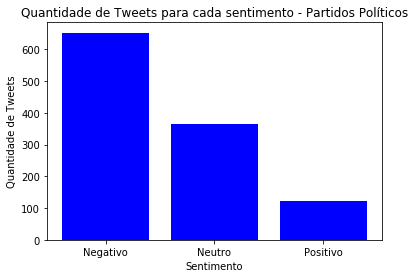

In [3]:
sentimentos_quantidade = conexao.selecionar_sentimento_partido()
quant_tweets = []
sentimentos = []
for i in range(0, len(sentimentos_quantidade)):
    sentimentos.append(sentimentos_quantidade[i]['sentimento'])
    quant_tweets.append(sentimentos_quantidade[i]['quant_tweets'])

plt.bar(sentimentos, quant_tweets, color = "blue")
plt.xticks(sentimentos)
plt.xlabel("Sentimento")
plt.ylabel("Quantidade de Tweets")
plt.title("Quantidade de Tweets para cada sentimento - Partidos Políticos")
plt.show()